In [1]:
import ezkl
import torch
from torch import nn
import json
import os
import time
import scipy
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math

In [2]:
%run -i ../../bench.py

In [3]:
data_50_path = os.path.join('data_50.json')
data_100_path = os.path.join('data_100.json')
data_300_path = os.path.join('data_300.json')
data_600_path = os.path.join('data_600.json')
data_1000_path = os.path.join('data_1000.json')

In [4]:
def gen_param_func(data_tensor_array):
    # for 1 value, just have 1 element in tensor array
    data_tensor = data_tensor_array[0]
    return [torch.exp(torch.mean(torch.log(data_tensor)))]

def model_func(param):
    class verifier_model(nn.Module):
        def __init__(self):
            super(verifier_model, self).__init__()
            self.w = nn.Parameter(data = param[0], requires_grad = False)

        def forward(self,X):
            # here is witness approach
            return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
    return verifier_model

sm_time =[0,0,0,0,0]
med_time = [0,0,0,0,0]
lar_time = [0,0,0,0,0]

Summary of Proving Time (1% accuracy)

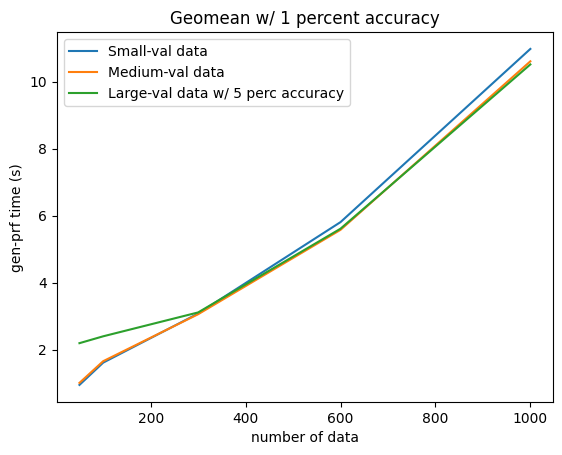

In [45]:
# Hence calibrate scale accordingly to compres the circuit size as long as the answer still within 1 percent
import matplotlib.pyplot as plt
data_number = [50, 100, 300, 600, 1000]
# sm_time = [0.9028279781341553, 1.5441746711730957, 2.9084150791168213, 5.424371004104614, 10.114448070526123]

plt.title("Geomean w/ 1 percent accuracy")
plt.xlabel("number of data")
plt.ylabel("gen-prf time (s)")
plt.plot(data_number, sm_time, label = 'Small-val data')

# med_time = [9.403581857681274, 9.359130144119263, 9.733612060546875, 10.122606039047241, 10.841309309005737]
plt.plot(data_number, med_time, label = 'Medium-val data')
# circuit of 600 and 1000 data are too big, so we put same number as in case of 100
# lar_time = [69.89282393455505, 69.30994296073914, 69.45930123329163, 69.69191193580627, 72.0965039730072]
plt.plot(data_number, lar_time, label = 'Large-val data w/ 5 perc accuracy')


plt.legend()


=============================================================================================================

Small-Valued Data: value 0-1, 3 decimals on 50, 100, 300, 600, 1000 data

In [5]:
sm_time[0]= bench_one(data_50_path, ['small'],model_func,gen_param_func, "50 small values","default",12, "resources", )

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_40377/1897035013.py:14: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  50 small values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [-498, 1020], 'logrows': 12, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 160, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Ln': {'scale': 512.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  0.9444639682769775
Theory result:  tensor(0.4045, dtype=torch.float64)
Our result:  [0.404296875]


In [6]:
sm_time[1]=bench_one(data_100_path,['small'], model_func,gen_param_func, "100 small values","default",13, "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_40377/1897035013.py:14: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  100 small values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [-1004, 1022], 'logrows': 13, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 310, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Ln': {'scale': 512.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier'

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  1.6095800399780273
Theory result:  tensor(0.4037, dtype=torch.float64)
Our result:  [0.404296875]


In [7]:
sm_time[2] = bench_one(data_300_path,['small'], model_func,gen_param_func, "300 small values","default",14, "resources")

=====================================  300 small values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_40377/1897035013.py:14: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [-3002, 1022], 'logrows': 14, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 910, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Ln': {'scale': 512.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [-3002, 1022], 'logrows': 14, 'num_inner_cols': 2, 'variables': [['batc

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  3.075051784515381
Theory result:  tensor(0.3771, dtype=torch.float64)
Our result:  [0.376953125]


In [8]:
sm_time[3] = bench_one(data_600_path,['small'], model_func,gen_param_func, "600 small values","default",15, "resources")

=====================================  600 small values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_40377/1897035013.py:14: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [-5790, 1022], 'logrows': 15, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 26240, 'total_assignments': 1810, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [26240, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Ln': {'scale': 512.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [-5790, 1022], 'logrows': 15, 'num_inner_cols': 2, 'variables': [['bat

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  5.804427862167358
Theory result:  tensor(0.3627, dtype=torch.float64)
Our result:  [0.36328125]


In [9]:
sm_time[4] = bench_one(data_1000_path,['small'], model_func,gen_param_func, "1000 small values","default", 16,"resources")

=====================================  1000 small values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_40377/1897035013.py:14: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [-9672, 1022], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 45920, 'total_assignments': 3010, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [45920, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Ln': {'scale': 512.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [-9672, 1022], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['bat

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  10.974960088729858
Theory result:  tensor(0.3555, dtype=torch.float64)
Our result:  [0.35546875]


=============================================================================================================

Medium data: value 1-100, 1 decimal on 50, 100, 300, 600, 1000 data

In [18]:
med_time[0] = bench_one(data_50_path,['medium'], model_func,gen_param_func, "50 medium values",[3],12, "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_40377/1897035013.py:14: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  50 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-6, 1568], 'logrows': 12, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 160, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Ln': {'scale': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10,

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  1.0050740242004395
Theory result:  tensor(45.4993, dtype=torch.float64)
Our result:  [45.5]


In [20]:
med_time[1] = bench_one(data_100_path,['medium'], model_func,gen_param_func, "100 medium values",[3],13, "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_40377/1897035013.py:14: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  100 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-14, 1592], 'logrows': 13, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 310, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Ln': {'scale': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 1

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  1.6530067920684814
Theory result:  tensor(41.0159, dtype=torch.float64)
Our result:  [41.0]


In [21]:
med_time[2] = bench_one(data_300_path,['medium'], model_func,gen_param_func, "300 medium values",[3],14, "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_40377/1897035013.py:14: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  300 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-44, 1596], 'logrows': 14, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 910, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Ln': {'scale': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier':

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  3.054382085800171
Theory result:  tensor(41.8828, dtype=torch.float64)
Our result:  [41.875]


In [22]:
med_time[3] = bench_one(data_600_path,['medium'], model_func,gen_param_func, "600 medium values",[3], 15,"resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_40377/1897035013.py:14: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  600 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-86, 1600], 'logrows': 15, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 26240, 'total_assignments': 1810, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [26240, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Ln': {'scale': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier'

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  5.5737998485565186
Theory result:  tensor(40.6786, dtype=torch.float64)
Our result:  [40.625]


In [23]:
med_time[4] = bench_one(data_1000_path,['medium'], model_func,gen_param_func, "1000 medium values",[3],16, "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_40377/1897035013.py:14: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0


=====================================  1000 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-150, 1600], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 45920, 'total_assignments': 3010, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [45920, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Ln': {'scale': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplie

spawning module 2
spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  10.605304956436157
Theory result:  tensor(40.0657, dtype=torch.float64)
Our result:  [40.125]


=============================================================================================================

Large-valued data: value 100-10000, 0 decimal on 50, 100, 300, 600, 1000 data

In [43]:
lar_time[0] = bench_one(data_50_path, ['large'],model_func,gen_param_func, "50 large values",[3],12, "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_40377/1897035013.py:14: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  50 large values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-6, 15504], 'logrows': 14, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 160, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Ln': {'scale': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10,

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.


gen prf time:  2.190821886062622
Theory result:  tensor(474.6037, dtype=torch.float64)
Our result:  [474.625]


In [44]:
lar_time[1]= bench_one(data_100_path,['large'], model_func,gen_param_func, "100 large values",[3],13, "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_40377/1897035013.py:14: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.


=====================================  100 large values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-16, 15728], 'logrows': 14, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 310, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Ln': {'scale': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 1

Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.


gen prf time:  2.3958327770233154
Theory result:  tensor(469.9762, dtype=torch.float64)
Our result:  [470.0]


In [42]:
lar_time[2] = bench_one(data_300_path,['large'], model_func,gen_param_func, "300 large values",[3],14, "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_40377/1897035013.py:14: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  300 large values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-44, 15888], 'logrows': 14, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 910, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Ln': {'scale': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier':

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  3.1083803176879883
Theory result:  tensor(452.7626, dtype=torch.float64)
Our result:  [452.75]


In [34]:
lar_time[3] = bench_one(data_600_path,['large'], model_func,gen_param_func, "600 large values",[3], 15,"resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_40377/1897035013.py:14: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  600 large values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-94, 15888], 'logrows': 15, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 26240, 'total_assignments': 1810, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [26240, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Ln': {'scale': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier'

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  5.607773780822754
Theory result:  tensor(460.5106, dtype=torch.float64)
Our result:  [460.5]


In [35]:
lar_time[4] = bench_one(data_1000_path,['large'], model_func,gen_param_func, "1000 large values",[3], 16,"resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_40377/1897035013.py:14: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0


=====================================  1000 large values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-156, 15888], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 45920, 'total_assignments': 3010, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [45920, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Ln': {'scale': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplie

spawning module 2
spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  10.512036085128784
Theory result:  tensor(468.8598, dtype=torch.float64)
Our result:  [468.875]
